# Linear Regresion

<p> This serves to illustrate the standard Machine Learning pipeline. Inspired from the example in this repo https://github.com/aymericdamien/TensorFlow-Examples </p>

In [ ]:
# A linear regression learning algorithm example using TensorFlow library.

#Inspired from the example by:  Aymeric Damien


In [123]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random
%matplotlib inline  

In [161]:
# Parameters
learning_rate = 0.001
training_epochs = 1000
display_step = 50

In [195]:
# Training Data

train_Y_full = [np.sin(x) for x in np.linspace(2.0, 3.0, num=100) ]
train_Y_full = np.array(train_Y_full);
train_X_full = np.linspace(2.0, 3.0, num=100);

n_samples = train_X.shape[0]

In [196]:
#Testing set and validation set
# Always have train and test set
# Create a share ration
share_ = 50;

#train set 
train_X = train_X_full[share_:]
validation_X = train_X_full[:share_]

#validation  set 
train_Y  = train_Y_full[share_:]
validation_Y = train_Y_full[:share_]


In [198]:
# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.Variable(rng.randn(),tf.float32,name="weight")
b = tf.Variable(rng.randn(),tf.float32,name="bias")

In [199]:
# Construct a linear model.
#This defines the prediction of target y of from input X and weight y plus a bias term
pred = tf.add(tf.multiply(W, X), b)


In [200]:
# Compute  squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Use Adam Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [201]:
# Initializing the variables
init = tf.global_variables_initializer()

<p>Dont validate on same data set you trained it. </p>
<p>As you can see from the graph below we , prediction on training set will be  better than the validation set<p>

Optimization Finished!
Training cost= 1.37811 W= -0.708476 b= 2.30276 



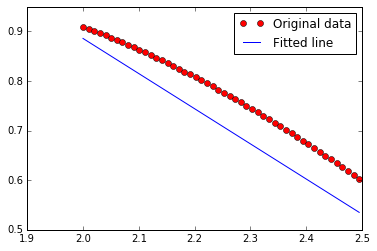

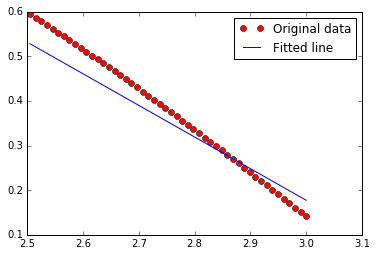

In [202]:
# Launch the graph
#batch_size = 20
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
            #sess.run(optimizer, feed_dict={X:x , Y:y })

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: x, Y: y})
            #print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            #    "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    #training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(validation_X, validation_Y, 'ro', label='Original data')
    plt.plot(validation_X, sess.run(W) * validation_X+ sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X+ sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()